# PREPROCESSING

#### For the Github repository containing this notebook, click [here](https://github.com/bluemberg/phishing-detector-nb).
#### For the repo containing the source code of the web app, click [here](https://github.com/bluemberg/phishing-detector).

## Step 0: Initialization

We start by importing the Web page Phishing Detection Dataset into the notebook. This dataset, sourced from Kaggle (https://www.kaggle.com/datasets/shashwatwork/web-page-phishing-detection-dataset), includes 11,430 URLs with 87 extracted features, with each entry classified as the URL of either a legitimate or phishing site. The extracted features are all numerical representations of the different aspects of the urls, such as their lengths, the average number of words in the path, or a number representing the presence or absence of characters like underscores or slashes. These all serve as tools to analyze the different entries to be able to arrive at a sufficiently accurate conclusion.

In [1]:
import pandas as pd

path = "dataset_phishing.csv"
phishing_data = pd.read_csv(path, header=0)
phishing_data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


## Part 0.5: Understanding the dataset

### Columns

#### Predictor Variables
- `url`: The complete url address of the website.
- `length_url`: Length of full url.
- `length_hostname`: Length of full hostname. This is the part after the scheme (e.g. `https`) and before the subdirectory. Example: `www.crestonwood.com`, which has `length_hostname`: 19.
- `ip`: Boolean value whether IP is present in hostname.
- `nb_dots`: Frequency of the character '.' in the URL.
- `nb_hyphens`: Frequency of the character '-' in the URL.
- `nb_at`: Frequency of the character '@' in the URL.
- `nb_qm`: Frequency of the character '?' in the URL.
- `nb_and`: Frequency of the character '&' in the URL.
- `nb_or`: Frequency of the character '|' in the URL.
- `nb_eq`: Frequency of the character '=' in the URL.
- `nb_underscore`: Frequency of the character '_' in the URL.
- `nb_tilde`: Frequency of the character '~' in the URL.
- `nb_percent`: Frequency of the character '%' in the URL.
- `nb_slash`: Frequency of the character '/' in the URL.
- `nb_star`: Frequency of the character '*' in the URL.
- `nb_colon`: Frequency of the character ':' in the URL.
- `nb_comma`: Frequency of the character ',' in the URL.
- `nb_semicolumn`: Frequency of the character ';' in the URL.
- `nb_dollar`: Frequency of the character '$' in the URL.
- `nb_space`: Frequency of the character ' ' in the URL.
- `nb_www`: Frequency of the substring 'www' in the URL.
- `nb_com`: Frequency of the substring 'com' in the URL.
- `nb_dslash`: Frequency of the substring '//' in the URL.
- `http_in_path`: Frequency of the substring 'http' in the URL.
- `https_token`: Boolean value whether HTTPS protocol is used.
- `ratio_digits_url`: Ratio of the number of digits over the URL length.
- `ratio_digits_host`: Ratio of the number of digits over the hostname length.
- `punycode`: Boolean value for the presence of punycode in the URL.
- `port`: Boolean value for the presence of port numbers in the URL.
- `tld_in_path`: Boolean value for the presence of TLD (top-level domain) in the path.
- `tld_in_subdomain`: Boolean value for the presence of TLD in the subdomain.
- `abnormal_subdomain`: Boolean value for pattern `w[w]?[0-9]*` instead of the typical `www` in the subdomain.
- `nb_subdomains`: The number of subdomains in the URL.
- `prefix_suffix`: Boolean value whether the character "-" is found in the domain name.
- `random_domain`: Boolean value for the presence of random characters in the domain name.
- `shortening_service`: Boolean value whether a URL shortening service is used.
- `path_extension`: Boolean value for the presence of path extension .txt, .exe, or .js in the URL path.
- `nb_redirection`: The number of internal redirections (redirections to pages with the same domain).
- `nb_external_redirection`: The number of external redirections (redirections to pages from different domain).
- `length_words_raw`: The number of words in the URL.
- `char_repeat`: The number of character repeats in the URL.
- `shortest_words_raw`: The number of shortest words in the URL.
- `shortest_word_host`: The number of shortest words in the hostname.
- `shortest_word_path`: The number of shortest words in the URL path.
- `longest_words_raw`: The number of longest words in the URL.
- `longest_word_host`: The number of longest words in the hostname.
- `longest_word_path`: The number of longest words in the URL path.
- `avg_words_raw`: The average length of words in the URL.
- `avg_word_host`: The average length of words in the hostname.
- `avg_word_path`: The average length of words in the URL path.
- `phish_hints`: The number of sensitive words in the URL.
- `domain_in_brand`: Boolean value for the presence of brand names in the domain name.
- `brand_in_subdomain`: Boolean value for the presence of brand names in the subdomain.
- `brand_in_path`: Boolean value for the presence of brand names in the URL path.
- `suspecious_tld`: Boolean value for the presence of a suspicious TLD.
- `statistical_report`: Boolean value whether the IP address matches one of top phishing domains.
- `nb_hyperlinks`: The number of links in URL web page.
- `ratio_intHyperlinks`: Ratio of internal hyperlinks over the total number of hyperlinks.
- `ratio_extHyperlinks`: Ratio of external hyperlinks over the total number of hyperlinks.
- `ratio_nullHyperlinks`: Ratio of null hyperlinks over the total number of hyperlinks.
- `nb_extCSS`: The number of external CSS files.
- `ratio_intRedirection`: Ratio of internal redirections in web page.
- `ratio_extRedirection`: Ratio of external redirections in web page.
- `ratio_intErrors`: Ratio of internal hyperlinks connection errors.
- `ratio_extErrors`: Ratio of external hyperlinks connection errors.
- `login_form`: Boolean value for the presence of login forms with external action links or empty actions.
- `external_favicon`: Boolean value whether external favicons are used.
- `links_in_tags`: The ratio of internal links in `<Link>` tags.
- `submit_email`: Boolean value whether form actions containing `mailto:` or `mail()` are used.
- `ratio_intMedia`: Ratio of internal media file links.
- `ratio_extMedia`: Ratio of external media file links.
- `sfh`: Boolean value whether forms with an empty string or `about:blank` are present.
- `iframe`: Boolean value whether invisible `<iframe>` tags are used.
- `popup_window`: Boolean value for the presence of pop-up windows with text fields.
- `safe_anchor`: Boolean value for the presence of tags with one of the following links `{‘#’, ‘javascript’, ‘mailto’}`.
- `onmouseover`: Boolean value for the presence of `onmouseover` attribute.
- `right_clic`: Boolean value for the presence of `event.button==2` as an action to `onmouseover` attribute.
- `empty_title`: Boolean value whether a web page title is absent (1) or present (0).
- `domain_in_title`: Boolean value for the presence of the domain of URL as part of the web page title.
- `domain_with_copyright`: Boolean value for the presence of the domain of URLs within the copyright logo.
- `whois_registered_domain`: Boolean value whether domain matches any WHOIS database record.
- `domain_registration_length`: The number of years the domain renewal amount was paid.
- `domain_age`: The age of URL domain.
- `web_traffic`: The web traffic of URL based on Alexa.
- `dns_record`: Boolean value whether URL domain is registered within the DNS.
- `google_index`: Boolean value whether web page is indexed by Google.
- `page_rank`: The rank of the web page, according to Openpagerank.

#### Outcome Variables
- `status`: Classification whether the web page is a phishing website (`phishing`) or a legitimate one (`legitimate`).

### Shape

In [2]:
phishing_data.shape

(11430, 89)

The dataset has 11,430 observations and 89 total features (including the URL and the classification `status`).

### Legitimate : Phishing Ratio 

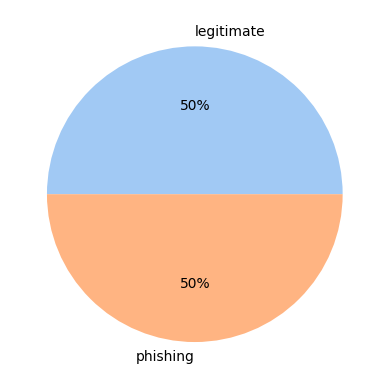

status
legitimate    5715
phishing      5715
Name: count, dtype: int64


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

status = phishing_data["status"]
freq = status.value_counts().tolist()
labels = ["legitimate", "phishing"]

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:2]

#create pie chart
plt.pie(freq, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

print(status.value_counts())

The dataset has an equal distribution of 50% phishing websites and 50% legitimate websites.

## Step 1: Handling missing values

Handling missing values is important as we do not want them to affect our model.

In [4]:
missing_list = []

for i in phishing_data.columns:
    missing = phishing_data[i].isnull().sum()
    if missing > 0:
        missing_list.append(i)

if len(missing_list) > 0:
    print("The columns with missing values are:\n")
    for column in missing_list:
        print(column)
else:
    print("There are no columns with missing values.")

There are no columns with missing values.


As there are no missing values anywhere in the dataset, we can now proceed to the next step.

# MACHINE LEARNING

## Step 2: Train Test Split
Before preparing the training and test sets, there is a need to properly configure `X` and `y`. By analyzing the dataset (as seen above), we know that the `url` and `status` columns must be excluded in `X` as they are not attributes that help determine whether a url is legitimate or not. This explains why these columns are dropped. On the other hand, `y` is expected to be the classification of each element; hence only the inclusion of the `status` column. 

The data is then split into the training and test sets with a 90:10 (training:test) split. It is possible to use this ratio without encountering overfitting as the dataset is fairly large, and the final accuracy doesn't suffer due to this ratio.


In [5]:
from sklearn.model_selection import train_test_split

X = phishing_data.drop(['url', 'status'], axis=1)
y = phishing_data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
X_train.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
8661,65,15,0,2,3,0,0,0,0,0,...,0,0,0,0,2252,9799,72,0,0,8
5616,69,20,0,3,0,0,0,0,0,0,...,0,1,1,0,336,395,0,0,1,0
10330,73,17,0,2,3,0,0,0,0,0,...,0,0,1,0,232,8899,145007,0,0,5
1981,75,27,1,3,0,0,0,0,0,0,...,0,1,1,0,343,6962,347165,0,1,3
9157,55,13,0,3,0,0,1,0,0,1,...,1,1,0,0,0,-1,28934,0,0,3


## Step 3: Feature Selection

In feature selection, we aim to further increase the prediction accuracy of the classification model by carefully selecting the most important variables and eliminating the ones that are irrelevant or introduce noise.

Advantages of feature selection:
- Increased performance: Fewer features will lead to shorter time needed to train the model.
- Prevents over-fitting: Redundant data may cause the model to make decisions based on noise. Eliminating noise also eliminates this possibility.
- Increased accuracy: Noise also leads to increased model inaccuracy once assessed on new data.

There are numerous techniques in carrying out feature selection.

### Variance Threshold

This is considered the baseline for feature selection. It discards the features with low variance across all observations. By default, it removes the columns with the same value in all samples, i.e. variance of 0.

In [6]:
from sklearn.feature_selection import VarianceThreshold

var_thr = VarianceThreshold(threshold = 0) #Removing both constant and quasi-constant
var_thr.fit(X_train)

concol = [column for column in X_train.columns if column not in X_train.columns[var_thr.get_support()]] # columns to be removed

for features in concol:
    print(features)

nb_or
ratio_nullHyperlinks
ratio_intRedirection
ratio_intErrors
submit_email
sfh


After performing `VarianceThreshold`, we found that the columns:
- `nb_or`
- `ratio_nullHyperlinks`
- `ratio_intRedirection`
- `ratio_intErrors`
- `submit_email`
- `sfh`

have a variance of 0. We now remove these columns from the dataset.

In [7]:
X_train = X_train.drop(concol,axis=1)
X_test = X_test.drop(concol, axis=1)

X_train.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_eq,nb_underscore,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
8661,65,15,0,2,3,0,0,0,0,0,...,0,0,0,0,2252,9799,72,0,0,8
5616,69,20,0,3,0,0,0,0,0,0,...,0,1,1,0,336,395,0,0,1,0
10330,73,17,0,2,3,0,0,0,0,0,...,0,0,1,0,232,8899,145007,0,0,5
1981,75,27,1,3,0,0,0,0,0,0,...,0,1,1,0,343,6962,347165,0,1,3
9157,55,13,0,3,0,0,1,0,1,0,...,1,1,0,0,0,-1,28934,0,0,3


## Step 4: Normalization/Standardization

K-nearest neighbors is a distance-based classifier that classifies new observations based on similar measures. SVM, on the other hand, tries to maximize the distance between the separating plane and the support vectors.

Therefore, when one feature values are larger than others, that feature will dominate the distance and affect the result of both KNN and SVM. Thus, we need to bring all variables to the same level.


Standardizing the data — transforming them to have a mean value 0 and standard deviation of 1 — for these columns will now result to a more feasible and justifiable model.


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Support Vector Machines (SVM)

## Step 5: Training the model
After normalizing the data for the columns, we can now train the model using the built-in SVC model. Next, we check the `accuracy_score` of the model by comparing the true values of the test set to the obtained predictions.

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

svm_clf_scaled = SVC(random_state=42).fit(X_train_scaled, y_train)

y_pred_test_svm_scaled = svm_clf_scaled.predict(X_test_scaled)

### Accuracy Metrics

The accuracy score acquired by this, along with its associated confusion matrix, is shown below.

In [10]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

precision = precision_score(y_test, y_pred_test_svm_scaled, pos_label='legitimate')
recall = recall_score(y_test, y_pred_test_svm_scaled, pos_label='legitimate')
f1score = f1_score(y_test, y_pred_test_svm_scaled, pos_label='legitimate')

print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")



Precision = 0.964527027027027
Recall = 0.976068376068376
F1 Score = 0.9702633814783347


SVM - with feature scaling
Test accuracy: 0.9693788276465442


<Axes: >

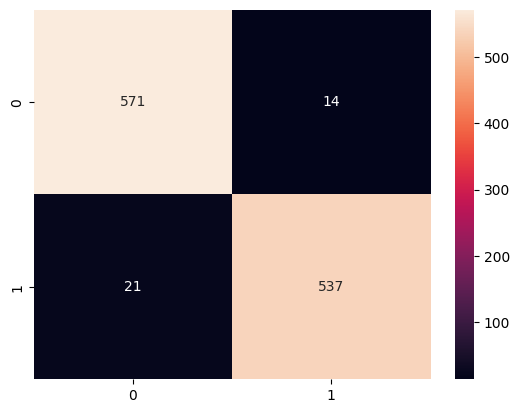

In [11]:
import seaborn as sns

accuracy_test_svm_scaled = accuracy_score(y_test,y_pred_test_svm_scaled)

print("SVM - with feature scaling")
print("Test accuracy:", accuracy_test_svm_scaled)
cf_matrix = confusion_matrix(y_test, y_pred_test_svm_scaled, labels=["legitimate", "phishing"])

sns.heatmap(cf_matrix, annot=True, fmt='g')

From here, we can see that SVM with feature scaling has an accuracy of around 96.94%. While this is already quite accurate, hyperparameter tuning will be used in an attempt to increase this value. 

Observing the confusion matrix (in the form of a heatmap) we can see equally promising results wherein only approximately 3.06% of the test set is incorrectly classified (i.e. a false positive or a false negative was acquired). Despite these results, hyperparameter tuning will be used in an attempt to increase this value. 

## Step 6: Finding a set of optimal parameter values

**Hyperparameter tuning** will be used to determine the best value of `C` and `gamma`. To accomplish this, we make use of `GridSearchCV` tool.

In [12]:
from sklearn.model_selection import GridSearchCV

param_grid_svm = {'C': [ 1, 5, 6, 10, 20 ], 'gamma':['scale', 'auto', 0.1, 0.01]}

grid_svm = GridSearchCV(SVC(),param_grid_svm,refit=True,verbose=2)
svm_tuned = grid_svm.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ...................................C=1, gamma=scale; total time=   0.8s
[CV] END ...................................C=1, gamma=scale; total time=   0.8s
[CV] END ...................................C=1, gamma=scale; total time=   0.8s
[CV] END ...................................C=1, gamma=scale; total time=   0.8s
[CV] END ...................................C=1, gamma=scale; total time=   0.8s
[CV] END ....................................C=1, gamma=auto; total time=   0.8s
[CV] END ....................................C=1, gamma=auto; total time=   0.8s
[CV] END ....................................C=1, gamma=auto; total time=   0.8s
[CV] END ....................................C=1, gamma=auto; total time=   0.8s
[CV] END ....................................C=1, gamma=auto; total time=   0.8s
[CV] END .....................................C=1, gamma=0.1; total time=   3.5s
[CV] END .....................................C

## Step 7: Using the best parameters

In [13]:
print(f"The best parameters are {grid_svm.best_params_}\n")
grid_predictions_svm = grid_svm.predict(X_test_scaled)

The best parameters are {'C': 6, 'gamma': 'auto'}



From here, we can see that the most optimal values to use in this model are when C is 6 and when gamma is auto.

### Accuracy Metrics

In [14]:
precision = precision_score(y_test, grid_predictions_svm, pos_label='legitimate')
recall = recall_score(y_test, grid_predictions_svm, pos_label='legitimate')
f1score = f1_score(y_test, grid_predictions_svm, pos_label='legitimate')

print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

Precision = 0.9711375212224108
Recall = 0.9777777777777777
F1 Score = 0.9744463373083475


SVM - with feature scaling and hyperparameter tuning
Test accuracy: 0.973753280839895


<Axes: >

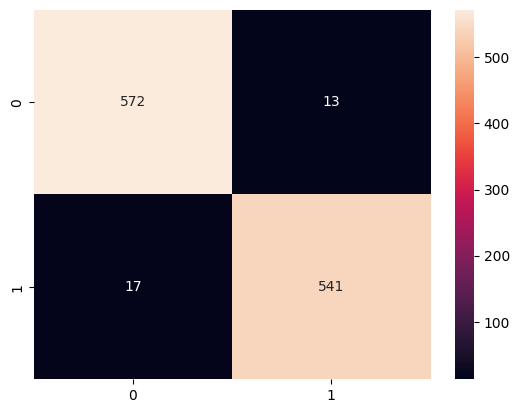

In [15]:
accuracy_test_svm_hyperparameter_tuning = accuracy_score(y_test, grid_predictions_svm)

print("SVM - with feature scaling and hyperparameter tuning")
print("Test accuracy:", accuracy_test_svm_hyperparameter_tuning)

hyperparameter_matrix_svm = confusion_matrix(y_test, grid_predictions_svm, labels=["legitimate", "phishing"])

sns.heatmap(hyperparameter_matrix_svm, annot=True, fmt='g')

Using these new parameters, the new test accuracy is around `97.38%`. This implies that **hyperparameter tuning had improved our model by 0.44%**. By observing the confusion matrix, we can also see that less values are classified incorrectly (as compared to earlier).

# K-Nearest Neighbors (KNN)

## Step 5: Training the model
After normalizing the data for the columns, we can now train the model using the built-in `KNeighborsClassifier` model. Eventually, we check the `accuracy_score` of the model by comparing the true values of the test set to the obtained predictions.


In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf_scaled = KNeighborsClassifier()
knn_clf_scaled.fit(X_train_scaled, y_train)

y_pred_test_knn_scaled = knn_clf_scaled.predict(X_test_scaled)

### Accuracy Metrics

The accuracy score acquired by this, along with its associated confusion matrix, is shown below.

In [17]:
precision = precision_score(y_test, y_pred_test_knn_scaled, pos_label='legitimate')
recall = recall_score(y_test, y_pred_test_knn_scaled, pos_label='legitimate')
f1score = f1_score(y_test, y_pred_test_knn_scaled, pos_label='legitimate')

print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

Precision = 0.9276315789473685
Recall = 0.9641025641025641
F1 Score = 0.9455155071248952


KNN - with feature scaling
Test accuracy: 0.9431321084864392


<Axes: >

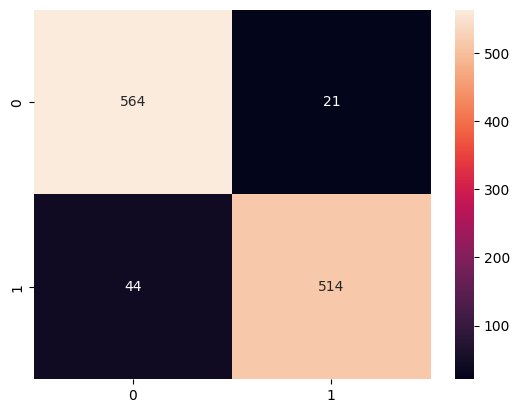

In [18]:
accuracy_test_knn_scaled = accuracy_score(y_test, y_pred_test_knn_scaled)

print("KNN - with feature scaling")
print("Test accuracy:", accuracy_test_knn_scaled)
cf_matrix = confusion_matrix(y_test, y_pred_test_knn_scaled, labels=["legitimate", "phishing"])

sns.heatmap(cf_matrix, annot=True, fmt='g')

From here, we can see that KNN with feature scaling has an accuracy of around 94.31%, which is already quite accurate. Observing the confusion matrix (in the form of a heatmap) we can see equally promising results wherein only approximately 5.69% of the test set is incorrectly classified (i.e. a false positive or a false negative was acquired). Despite these results, hyperparameter tuning will be used in an attempt to increase this value. 

## Step 6: Finding a set of optimal parameter values

**Hyperparameter tuning** will be used to determine the best value of `n_neighbors`, `weights` and `metric`. To accomplish this, we make use of `GridSearchCV` tool.

In [19]:
from sklearn.model_selection import GridSearchCV

param_grid_knn = {"n_neighbors": range(1, 11), "weights":["uniform", "distance"], 
            "metric":["manhattan", "minkowski", "euclidean"]}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv = 10, refit=True, verbose=2)
knn_tuned = grid_knn.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
[CV] END ...metric=manhattan, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ...metric=manhattan, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ...metric=manhattan, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ...metric=manhattan, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ...metric=manhattan, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ...metric=manhattan, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ...metric=manhattan, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ...metric=manhattan, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ...metric=manhattan, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ...metric=manhattan, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=1, we

## Step 7: Using the best parameters

In [20]:
print(f"The best parameters are {grid_knn.best_params_}\n")
grid_predictions_knn = grid_knn.predict(X_test_scaled)

The best parameters are {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}



From here, we can see that it is better to use the`Manhattan` distance metric as compared to the default metric `Minkowski`. Moreover, we can see that using the `distance` weighing function and using `7` neighbors is ideal.




### Accuracy Metrics

In [21]:
precision = precision_score(y_test, grid_predictions_knn, pos_label='legitimate')
recall = recall_score(y_test, grid_predictions_knn, pos_label='legitimate')
f1score = f1_score(y_test, grid_predictions_knn, pos_label='legitimate')

print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

Precision = 0.9546218487394958
Recall = 0.9709401709401709
F1 Score = 0.9627118644067797


KNN - with feature scaling and hyperparameter tuning
Test accuracy: 0.9615048118985127


<Axes: >

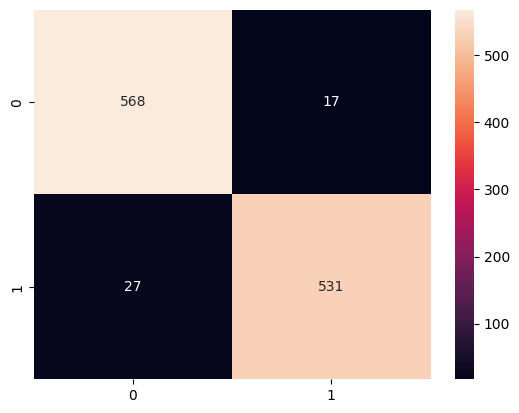

In [22]:
accuracy_test_knn_hyperparameter_tuning = accuracy_score(y_test, grid_predictions_knn)

print("KNN - with feature scaling and hyperparameter tuning")
print("Test accuracy:", accuracy_test_knn_hyperparameter_tuning)

hyperparameter_matrix = confusion_matrix(y_test, grid_predictions_knn, labels=["legitimate", "phishing"])

sns.heatmap(hyperparameter_matrix, annot=True, fmt='g')

Using these new parameters, the new test accuracy is around `96.15%`. This implies that **hyperparameter tuning had improved our model by 1.84%**. By observing the confusion matrix, we can also see that less values are classified incorrectly (as compared to earlier).

# COMPARISON OF MODELS

Other existing models built with this dataset utilize algorithms, including Random Forest, Multilayer Perception, Decision Tree, K Nearest Neighbors, and Gaussian Naive Bayes, without hyperparameter tuning. The following are the highest accuracy scores achieved through using the aforementioned classifiers: 

1. [Random Forest Classifier](https://www.kaggle.com/code/muhilkannan/phishing-website-detection-random-forest-96?scriptVersionId=124100734&cellId=37) : 96.50%
2. [Multilayer Perception Classifier](https://www.kaggle.com/code/ahmadsaleh2001/using-mlp-scikit-learn-with-acc-96?scriptVersionId=112686138&cellId=6): 96.11%
3. [Decision Tree Classifier](https://www.kaggle.com/code/subhadrasoumi/webpage-phishing?scriptVersionId=69282575&cellId=9): 90.97%
4. [K Nearest Neighbors Classifier](https://www.kaggle.com/code/subhadrasoumi/webpage-phishing?scriptVersionId=69282575&cellId=11): 94.54%
5. [Gaussian Naive Bayes Classifier](https://www.kaggle.com/code/subhadrasoumi/webpage-phishing?scriptVersionId=69282575&cellId=12): 49.93%


In [23]:
model_compare = pd.DataFrame({'models': ['SVM', 'RF', 'current KNN', 'MLP', 'past KNN', 'DT', 'GNB'],
                            'accuracy': [97.38, 96.5, 96.15, 96.11, 94.54, 90.97, 49.93]})

print(model_compare)

        models  accuracy
0          SVM     97.38
1           RF     96.50
2  current KNN     96.15
3          MLP     96.11
4     past KNN     94.54
5           DT     90.97
6          GNB     49.93


[Text(0, 0, '97.4'),
 Text(0, 0, '96.5'),
 Text(0, 0, '96.2'),
 Text(0, 0, '96.1'),
 Text(0, 0, '94.5'),
 Text(0, 0, '91.0'),
 Text(0, 0, '49.9')]

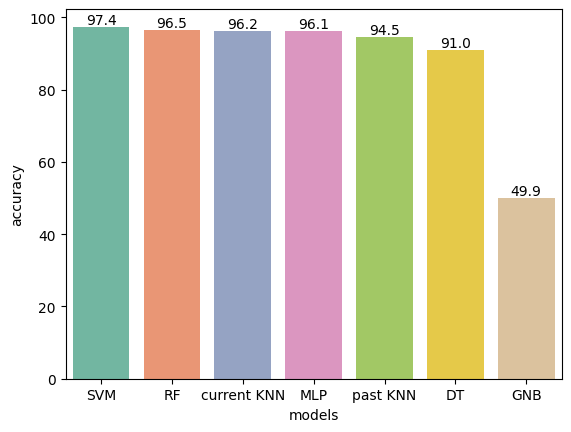

In [24]:
#create vertical barplot
ax = sns.barplot(x=model_compare.models, y=model_compare.accuracy, orient='v', palette = 'Set2')

ax.bar_label(ax.containers[0], fmt='%.1f')


From the data above, the most effective from the existing models is the Random Forest Classifier with 96.5% accuracy. On the other hand, the K-Nearest Neighbors model and the Support Vector Machines model, both with hyperparameter tuning, had accuracy scores of 96.15% and 97.38%, respectively. 

Although our KNN model with hyperparameter tuning did not manage to get a higher accuracy than the existing Random Forest model, our SVM  with hyperparameter tuning proves to be the most effective among all models in determining the legitimacy of a given webpage.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ee7555e5-26a4-4c4c-a79c-80edb2017ecb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>